In [83]:
from zget_data import get_responses, get_qdetails, page_map, attention, quest_map
import pandas as pd
import json

In [84]:
password_response, time_response, survey_response = get_responses(1)

Total: 27


## Password Analysis

In [85]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2,password2_recall3
0,amandanike@91s,NaN,NaN,NaN
1,%Gcaq#&,%Gacq#&,%Gaq#&,%GcaQ#&
2,Lisa96,NaN,NaN,NaN
3,tyxkes-Nedxip-2qatve,NaN,NaN,NaN
4,IndyColt$!,NaN,NaN,NaN
5,math13@!,NaN,NaN,NaN
6,I@teabanana1947,NaN,NaN,NaN
7,bcr6asb&9,NaN,NaN,NaN
8,L3ft%0rriGHT,NaN,NaN,NaN
9,MA@RUIZ,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.599,32.481,11.720,71.919,137.019,206.751,27.432,90.620,21.551,33.020,33.760,57.601,12.157883
1,5.746,28.531,11.954,27.890,75.042,207.642,34.146,93.987,11.395,40.123,76.771,70.316,11.392383
2,4.389,39.829,17.225,49.519,125.534,288.860,29.124,85.178,89.826,34.015,6.576,165.225,15.588333
3,263.435,318.978,11.099,25.617,66.016,159.047,6.126,17.295,7.791,18.064,7.715,34.306,15.591483
4,6.580,29.994,7.946,463.937,69.306,153.429,17.915,65.440,10.078,32.954,13.770,63.175,15.575400


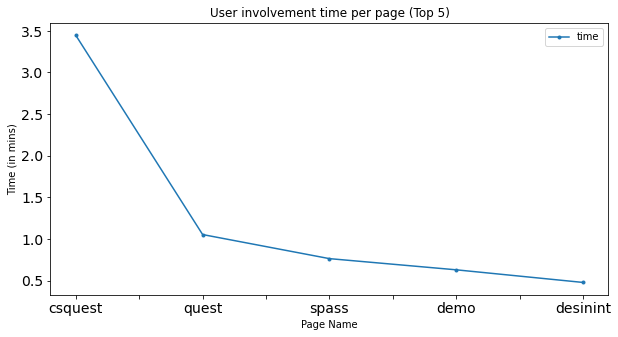

In [86]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [87]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [88]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
quest = quest - 4
quest.update(quest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['STD'] = quest.std(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,mean,median,STD
structured,3.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,...,2.0,0.0,2.0,2.0,3.0,1.0,2.0,2.222222,2.000000,0.772620
ordered,3.0,2.0,2.0,2.0,3.0,-1.0,3.0,3.0,1.0,2.0,...,1.0,1.0,0.0,1.0,2.0,2.0,3.0,1.851852,2.000000,1.216385
well grouped,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.037037,2.000000,0.731053
rewarding,3.0,2.0,1.0,2.0,2.0,-2.0,3.0,0.0,0.0,2.0,...,0.0,-2.0,2.0,0.0,0.0,1.0,2.0,1.074074,1.537037,1.488753
organized,3.0,2.0,2.0,2.0,3.0,0.0,3.0,3.0,2.0,3.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.148148,2.000000,0.832994
beneficial,3.0,3.0,2.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,...,1.0,-2.0,2.0,2.0,3.0,1.0,3.0,1.925926,2.000000,1.360897
helpful,3.0,3.0,2.0,3.0,3.0,1.0,2.0,3.0,3.0,1.0,...,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.296296,2.000000,0.749152
easy to learn,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,2.0,3.0,3.0,2.0,2.0,2.074074,2.000000,0.997446
clear,3.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,3.0,1.0,...,2.0,1.0,2.0,3.0,3.0,3.0,2.0,2.148148,2.000000,0.989744
stylish,3.0,2.0,2.0,1.0,1.0,-1.0,2.0,1.0,3.0,0.0,...,3.0,1.0,0.0,1.0,2.0,1.0,3.0,1.333333,1.000000,1.103683


In [89]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')
    print(f'{k}: {v["STD"].std()}')

Perspicuity: 2.175925925925926
Perspicuity: 0.15466424169619358
Aesthetics: 1.5648148148148149
Aesthetics: 0.17816471329627728
Usefulness: 1.8055555555555556
Usefulness: 0.3272300597262926
Clarity: 2.064814814814815
Clarity: 0.22271592659673528


### CSQuest

In [90]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['8-1', '10-1']
csquestqual = csquest.loc[qualindex]
# csquestqual.to_csv('qualitative/csquest_logos.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
8-1,"[Social Media, Financial Websites, E-commerce ...","[Social Media, Financial Websites, E-commerce ...","[Course Management Websites, e.g. Canvas, Blac...","[Social Media, Email, Financial Websites]","[Email, Financial Websites, Gaming Websites, E...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, Gami...","[Email, Financial Websites, E-commerce Website...","[Financial Websites, E-commerce Websites, Gove...","[Social Media, Email, Gaming Websites]",...,"[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gami...","[Financial Websites, Government Websites]","[Social Media, Email, Financial Websites, E-co...","[Social Media, Gaming Websites, E-commerce Web...","[Social Media, Financial Websites, Gaming Webs...","[Financial Websites, E-commerce Websites, Gove...","[Social Media, Financial Websites, E-commerce ...","[Social Media, Financial Websites, E-commerce ..."
10-1,81% of data breaches in 2020 happened due to w...,81% of data breaches in 2020 happened due to w...,The most to create a strong password is our na...,The information on slide 2 tells me what I mig...,That 81% of data breaches in 2020 happened due...,Larger percentage of the people make weak perc...,Showing people that a large percentage of them...,The basic facts about how 81% of data breaches...,I think the first image motivated me the most ...,A strong password is one that is designed to b...,...,The visual representation of the number of peo...,The second post was motivates me to create str...,The information about why it happened and what...,81% of data breaches were due to weak passwords,The first image motivates me to create strong ...,I realize that password will be see it was ama...,Knowing how many people have their data compro...,The statistics stating the actual numbers of p...,where it show that 4 out of 10 people use weak...,I am thinking of installing a hard password fo...


In [91]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
csquestquant = csquestquant - 4
csquestquant.update(csquestquant)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)
csquestquant['STD'] = csquestquant.std(axis=1)

csquestquant 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,mean,median,STD
Makes me worried,-3.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,-1.0,...,0.0,2.0,0.0,-2.0,-3.0,0.0,-2.0,0.481481,0.740741,1.677643
Encourages me to create a strong password,2.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0,3.0,2.0,...,1.0,3.0,1.0,3.0,0.0,1.0,2.0,2.148148,2.000000,0.832994
Makes me feel emotionally connected to the presented scenario,1.0,0.0,1.0,0.0,1.0,1.0,2.0,-1.0,-2.0,2.0,...,0.0,3.0,-2.0,1.0,-3.0,1.0,1.0,0.925926,1.000000,1.645960
Makes me feel personally connected to the presented scenario,3.0,1.0,1.0,1.0,2.0,1.0,2.0,-1.0,-2.0,1.0,...,1.0,2.0,1.0,1.0,-3.0,2.0,3.0,1.222222,1.111111,1.447641
easy to follow,2.0,3.0,2.0,2.0,3.0,0.0,1.0,3.0,3.0,0.0,...,1.0,2.0,0.0,3.0,2.0,1.0,2.0,1.851852,2.000000,1.216385
Novel,3.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,...,1.0,2.0,1.0,0.0,0.0,1.0,3.0,1.037037,1.000000,1.017074
Informative,2.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,...,2.0,3.0,0.0,2.0,2.0,2.0,2.0,2.185185,2.000000,0.709808
Easy to understand,2.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,1.0,3.0,1.0,3.0,3.0,2.0,2.0,2.444444,3.000000,0.680459
To the Point,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,1.0,...,1.0,1.0,0.0,2.0,3.0,2.0,3.0,2.296296,2.648148,0.839838
Engaging,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,2.0,3.0,3.0,2.0,2.0,2.074074,2.000000,0.997446


In [92]:
par = csquestquant[['Makes me feel personally connected to the presented scenario', 'easy to follow', 'Novel', 'Attractive', 'Informative', 'To the Point', 'Creative', 'Engaging']].copy()
print(par)
par['mean'] = par.mean(axis=1)
par['STD'] = par.std(axis=1)
par['median'] = par.median(axis=1)
par


KeyError: "None of [Index(['Makes me feel personally connected to the presented scenario',\n       'easy to follow', 'Novel', 'Attractive', 'Informative', 'To the Point',\n       'Creative', 'Engaging'],\n      dtype='object')] are in the [columns]"

### First Password Survey

In [ ]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,mean,median
"I do not change my passwords, unless I have to.",5,2,6,6,6,7,2,6,7,3,...,1,5,5,5,6,2,6,7,5.037037,6.0
I use different passwords for different online accounts that I have.,7,7,6,6,4,6,6,7,7,6,...,7,7,7,4,6,7,5,6,5.518519,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",6,5,6,5,5,5,6,7,7,5,...,7,2,7,5,7,7,6,7,5.555556,6.0
I do not include special characters in my password if it’s not required.,1,1,7,1,2,1,1,1,2,3,...,1,7,4,3,2,1,2,6,2.666667,2.0


### Second Password Survey

In [ ]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,mean,median
strength of password,7,6,7,7,6,6,7,4,6,7,...,6,5,7,6,6,7,5,7,6.259259,6.129630
motivated after going through design,7,7,7,7,7,5,7,5,7,6,...,7,5,6,4,7,4,6,6,6.185185,6.092593
Hard to remember,6,4,6,7,3,6,4,5,6,5,...,3,6,7,2,2,7,3,7,4.629630,4.814815
Can be easily guessed by a hacker,1,1,6,1,2,7,1,1,1,6,...,1,4,2,1,2,1,3,6,2.370370,1.500000
Can be easily guessed by my close friends or family members,1,1,6,1,2,6,1,1,1,6,...,1,1,2,2,1,1,4,7,2.333333,1.500000
Stronger than the passwords I usually use,7,4,6,7,4,5,2,1,3,5,...,6,6,7,6,2,2,2,6,4.888889,5.000000


### Demographics

In [ ]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

demo = demo.rename(new_index).transpose()
demo


,What is your gender?,What is your age range?,What is your race?,What is your highest achieved education level?,What is the primary field of your education?,Which of the following best describes your primary occupation?,Which of the following best describes your experience in computer and technology related fields?,Which of the following best describes your experience in cybersecurity?
0,Man,35-39 years old,[Native American or American Indian],Four-year College Degree,Business,Business or industry,Pursuing or completed a degree,Formal training
1,Man,Above 65 years old,[White],Two-year College Degree,"Journalism, Media and Communication",retired,Self-taught,Self-taught
2,Woman,25-29 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Business or industry,Hold or held a work position,Self-taught
3,Man,50-54 years old,[Asian],Graduate degree (MS/Doctorate),"Economics, Humanities and Social Sciences",Business or industry,Self-taught,Self-taught
4,Man,30-34 years old,[White],High School Graduate,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Self-taught
5,Man,40-44 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Hold or held a work position
6,Man,45-49 years old,[White],Graduate degree (MS/Doctorate),Business,Government,Self-taught,Self-taught
7,Man,40-44 years old,[White],Less than High School,I prefer not to answer,I prefer not to answer,Self-taught,Self-taught
8,Man,30-34 years old,[White],High School Graduate,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Self-taught
9,Man,55-59 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,No experience


In [ ]:
demo['What is your gender?'].value_counts()

Man      23
Woman     4
Name: What is your gender?, dtype: int64